## Observations and Insights 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "/Users/petergunn/Matplotlib-Homework/data/Mouse_metadata.csv"
study_results_path = "/Users/petergunn/Matplotlib-Homework/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_data = pd.merge(mouse_metadata, study_results, how='outer')
# Display the data table for preview
Combined_data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [45]:
# Checking the number of mice.
mice=Combined_data["Mouse ID"].value_counts()
mice_total =len(mice)
mice_total

249

In [46]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [47]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicates_total =pd.DataFrame(mice_duplicates)
mice_duplicates_total


,0
0,g989


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data_df = Combined_data[Combined_data['Mouse ID'].isin(mice_duplicates)==False]

In [49]:
# Checking the number of mice in the clean DataFrame.
clean_mice_amount =clean_mice_data_df["Mouse ID"].value_counts()
mice_total_cleaned =len(clean_mice_amount)
mice_total_cleaned


248

## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mice_total_mean =  clean_mice_data_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
mice_total_mean


mice_total_median =  clean_mice_data_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
mice_total_median


mice_total_variance =  clean_mice_data_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
mice_total_variance



mice_total_stdev =  clean_mice_data_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
mice_total_stdev

mice_total_sem =  clean_mice_data_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
mice_total_sem



Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_summary  = pd.DataFrame({"Mean":  mice_total_mean, "Median":mice_total_median, "Variance":mice_total_variance, "Standard Deviation": mice_total_stdev, "SEM": mice_total_sem})

stat_summary 


# Using the aggregation method, produce the same summary statistics in a single line
stat_group = clean_mice_data_df.groupby('Drug Regimen')
mice_stat_summary_agg = stat_group.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
mice_stat_summary_agg


/var/folders/66/f18kvdb57tb8z4p663hx6phw0000gn/T/ipykernel_2677/4220737347.py:9: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  mice_stat_summary_agg = stat_group.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

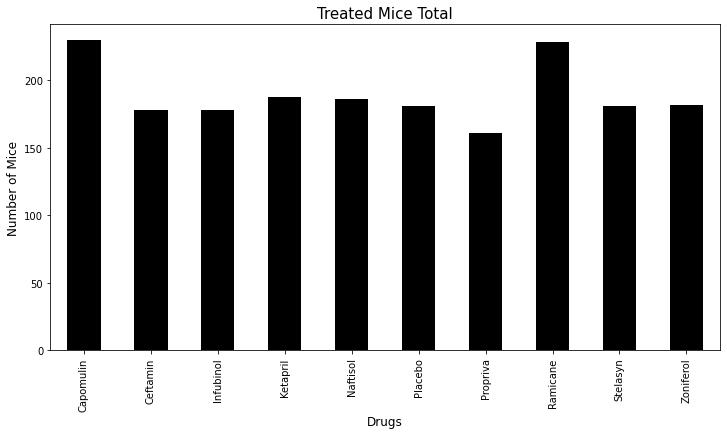

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [52]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

tested_mice = Combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 


pandas_bar = tested_mice.plot.bar(figsize=(12,6), color='black',fontsize = 10)
tested_mice


plt.xlabel("Drugs",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
plt.title("Treated Mice Total",fontsize = 15)


plt.show()

tested_mice

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

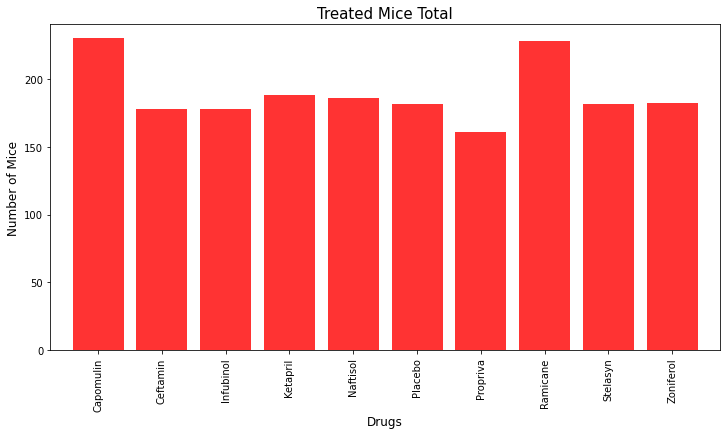

In [53]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_list =(Combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(tested_mice))
fig1, ax1 = plt.subplots(figsize=(12,6))
plt.bar(x_axis, mice_list, color='red', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.xlabel("Drugs",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)

plt.title("Treated Mice Total",fontsize = 15)

tested_mice


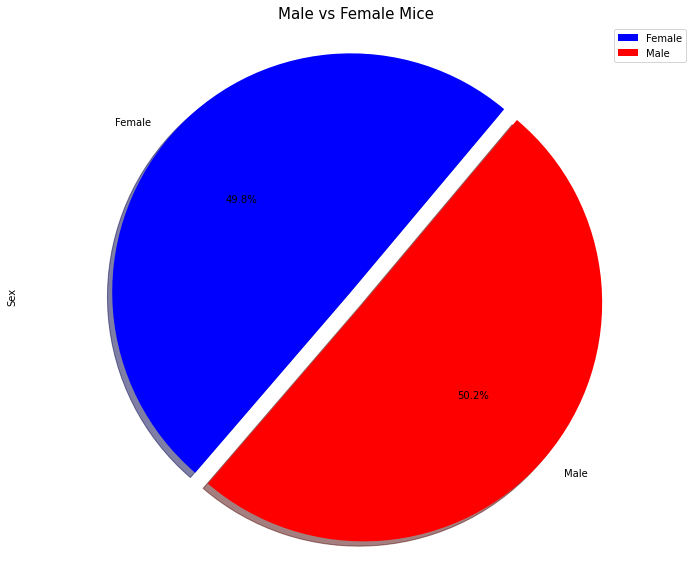

In [54]:
#group genders
gender_group = Combined_data.groupby(["Mouse ID","Sex"])
gender_group_df = pd.DataFrame(gender_group.size())
mice_gender = pd.DataFrame(gender_group_df.groupby(["Sex"]).count())

mice_gender.columns = ["Total Count"]

mice_gender["Percentage of Sex"] = (100*(mice_gender["Total Count"]/mice_gender["Total Count"].sum()))

mice_gender["Percentage of Sex"] = mice_gender["Percentage of Sex"]
mice_gender

# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ['blue', 'red']
explode = (0.07, 0)
pie_pandas = mice_gender.plot.pie(y='Total Count',figsize=(12,10), colors = colors, startangle=50, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mice',fontsize = 15)
plt.ylabel('Sex')
plt.axis("equal")

plt.show()


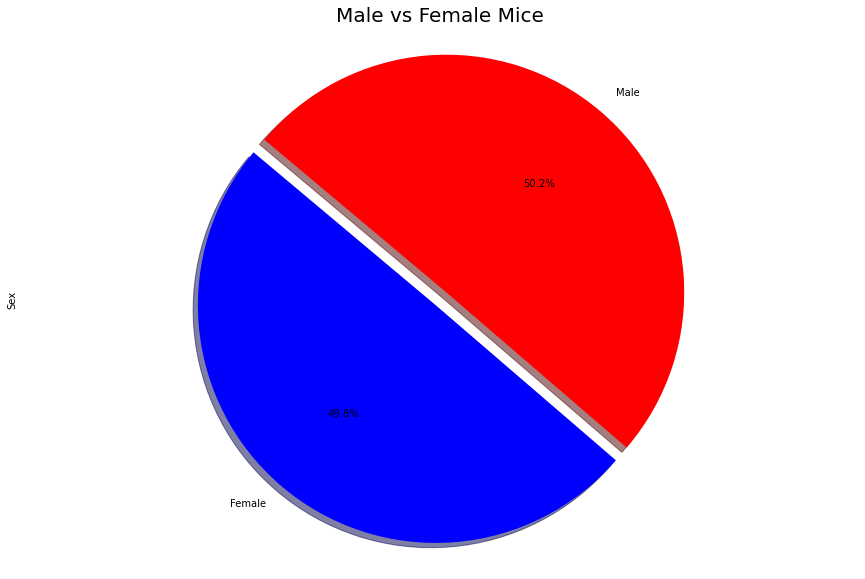

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.8,50.2]

#Set colors for each section of the pie
colors = ['blue', 'red']

#Determoine which section of the circle to detach
explode = (.07, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mice',fontsize = 20)
plt.ylabel('Sex')
#Set equal axis
plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [71]:
# Put treatments into a list for for loop (and later for plot labels)
Capomulin_tumor_vol = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Loop kept giving me an error
# Ramicane

Ramicane_group = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_group)
Ramicane_merge = pd.merge(Ramicane_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")

Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Infubinol 


Infubinol_group = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_group)
Infubinol_merge = pd.merge(Infubinol_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Ceftamin
Ceftamin_group = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_group)
Ceftamin_merge = pd.merge(Ceftamin_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)



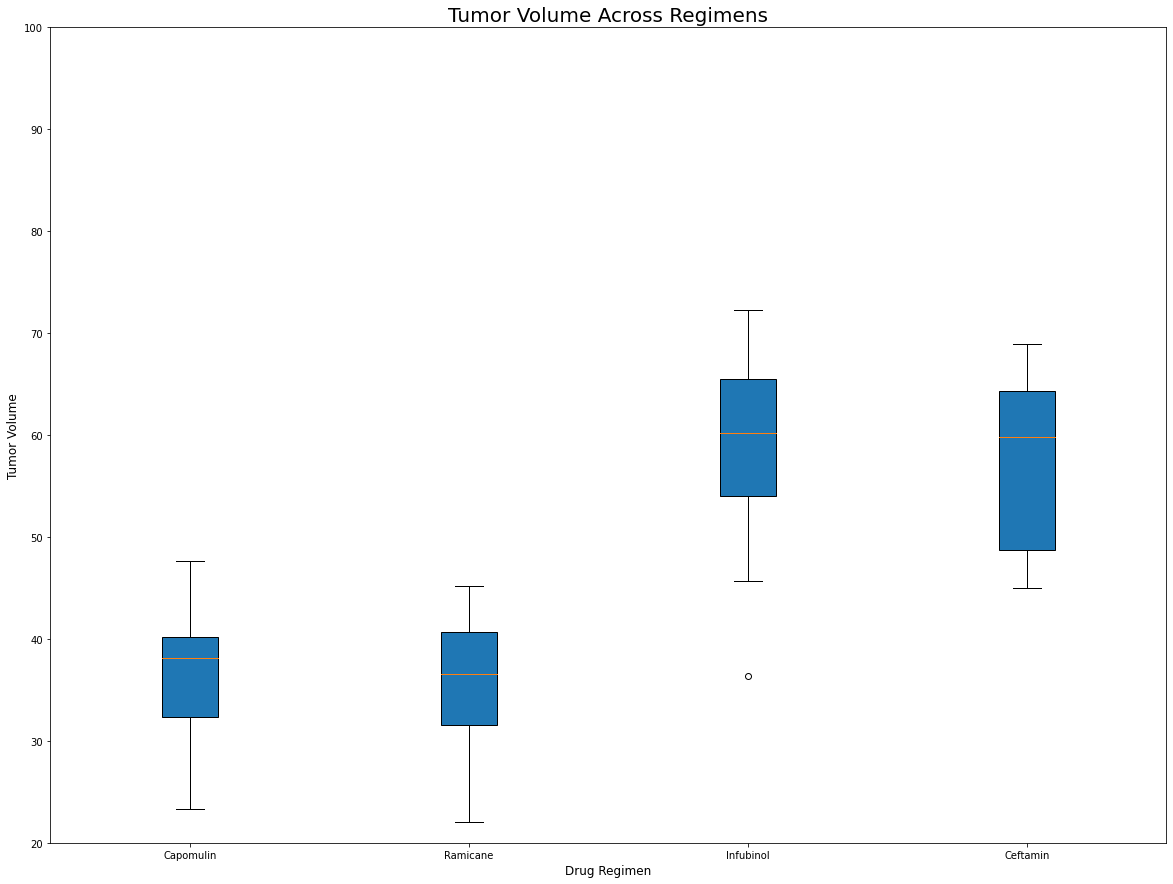

In [70]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_complete = [Capomulin_tumor_vol, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(20, 15))
ax1.set_title('Tumor Volume Across Regimens',fontsize =20)
ax1.set_ylabel('Tumor Volume',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(boxplot_complete, labels=Regimen, widths = 0.2, patch_artist=True,vert=True)

plt.ylim(20, 100)

plt.show()

## Line and Scatter Plots

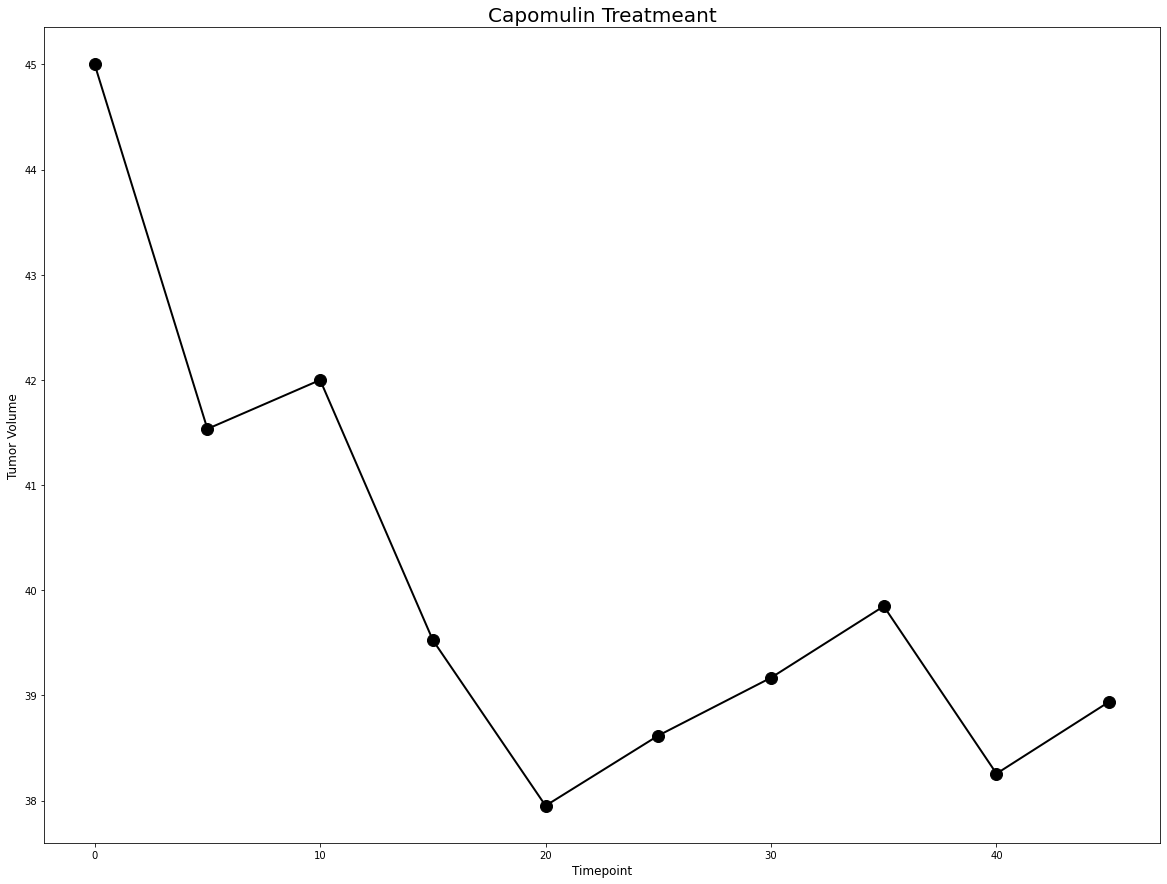

In [69]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
linegraph_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b742",:]

x_axis = linegraph_df["Timepoint"]
tumsiz = linegraph_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(20, 15))
plt.title('Capomulin Treatmeant',fontsize =20)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=12,marker="o",color="black", label="Fahreneit")
plt.xlabel('Timepoint',fontsize =12)
plt.ylabel('Tumor Volume',fontsize =12)



plt.show()

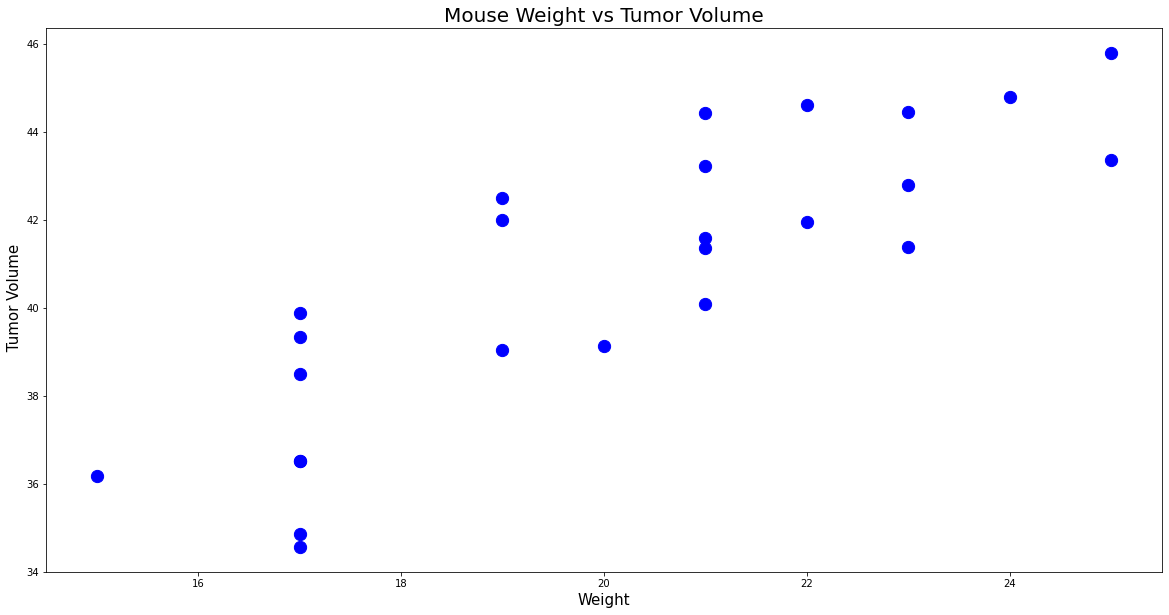

In [68]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(20, 10))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=150, color="blue")
plt.title('Mouse Weight vs Tumor Volume',fontsize =20)
plt.xlabel('Weight',fontsize =15)
plt.ylabel(' Tumor Volume',fontsize =15)


plt.show()

## Correlation and Regression

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)


In [62]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



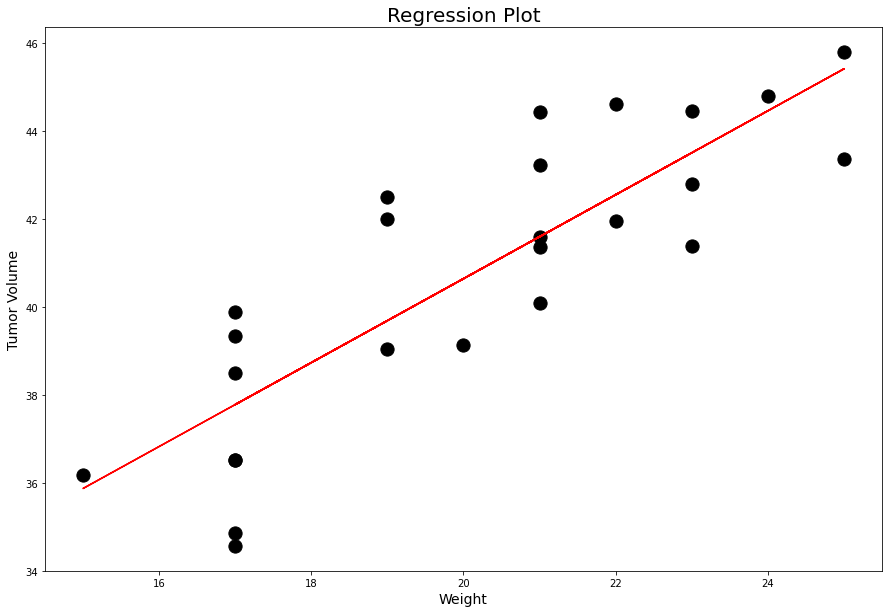

In [66]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="black")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot',fontsize =20)
plt.xlabel('Weight',fontsize =14)
plt.ylabel('Tumor Volume',fontsize =14)

plt.show()